In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
from hyperstrings.hypergraph import Hypergraph


vertices: set[int] = {0, 1, 2, 3, 4, 5, 6, 7}
vertex_sources: dict[int, set[tuple[int, int]]] = {
    0: set(),
    1: {(0, 0)},
    2: {(0, 1), (1, 0), (1, 1), (1, 2)},
    3: {(2, 1)},
    4: {(3, 0)},
    5: {(2, 0)},
    6: set(),
    7: {(3, 1)}
}
vertex_targets: dict[int, set[tuple[int, int]]] = {
    0: {(0, 0), (1, 0), (2, 1)},
    1: {(2, 0)},
    2: {(2, 2), (3, 1)},
    3: {(3, 0)},
    4: set(),
    5: set(),
    6: {(0, 1)},
    7: set()
}
vertex_labels: dict[int, str] = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'A', 6: 'B', 7: 'R'
}

hyperedges: set[int] = {0, 1, 2, 3}
hyperedge_sources: dict[int, list[int]] = {
    0: [0, 6],
    1: [0],
    2: [1, 0, 2],
    3: [3, 2]
}
hyperedge_targets: dict[int, list[int]] = {
    0: [1, 2],
    1: [2, 2],
    2: [5, 3],
    3: [4, 7]
}
hyperedge_labels: dict[int, str] = {
    0: 'f', 1: 'g', 2: 'h', 3: 'k'
}

inputs: list[int] = [0]
outputs: list[int] = [4, 5]

hypergraph = Hypergraph(
    vertices,
    vertex_sources,
    vertex_targets,
    vertex_labels,
    hyperedges,
    hyperedge_sources,
    hyperedge_targets,
    hyperedge_labels,
    inputs,
    outputs
)

In [49]:
hypergraph.layer_decomposition()

[[0, 6], [0, 1, 4], [1, 2, 8], [2, 5], [3, 5, 9], [3, 6], [4, 7, 10]]

In [50]:
hypergraph.print()

v input v
['A', 'B']
['f', 'g', 'id_A']
['B', 'C', 'A']
['h', 'id_C']
['D', 'A', 'C']
['k', 'id_A']
['E', 'R', 'A']
^ output ^


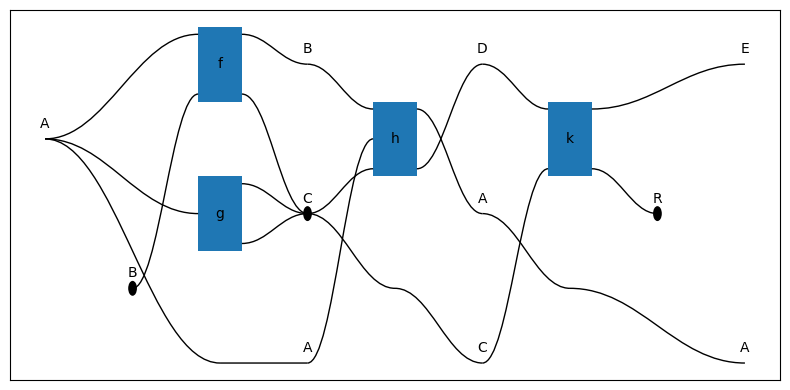

In [54]:
hypergraph.draw_matplotlib()

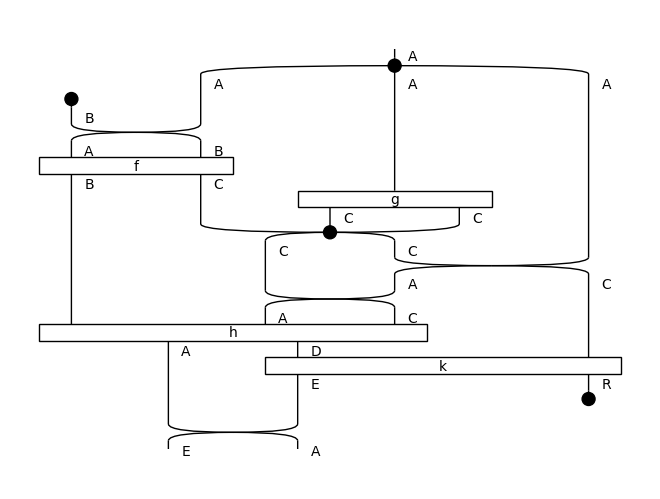

In [55]:
hypergraph.to_discopy().to_diagram().draw()

In [6]:
hypergraph.normal_form

Hypergraph(vertices={0, 1, 2, 3, 4, 5}, vertex_sources={0: set(), 1: {(0, 0)}, 2: {(0, 1), (1, 0), (1, 1), (1, 2)}, 3: {(2, 1)}, 4: {(3, 0)}, 5: {(2, 0)}}, vertex_targets={0: {(1, 0), (2, 1), (0, 0)}, 1: {(2, 0)}, 2: {(3, 1), (2, 2)}, 3: {(3, 0)}, 4: set(), 5: set()}, vertex_labels={0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'A'}, hyperedges={0, 1, 2, 3}, hyperedge_sources={0: [0], 1: [0], 2: [1, 0, 2], 3: [3, 2]}, hyperedge_targets={0: [1, 2], 1: [2, 2], 2: [5, 3], 3: [4]}, hyperedge_labels={0: 'f', 1: 'g', 2: 'h', 3: 'k'}, inputs=[0], outputs=[4, 5], vertex_coords={}, hyperedge_coords={})

In [9]:
hypergraph.term_decomposition()

'(f ⨂ g ⨂ id_A) ⨟ (h ⨂ id_C) ⨟ (k ⨂ id_A)'

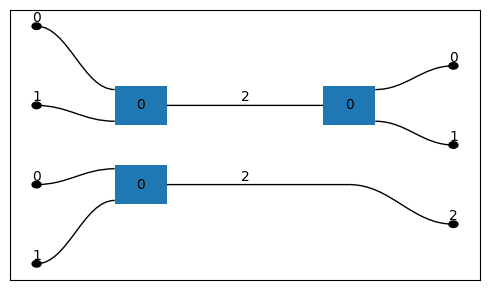

In [56]:
from yarrow import FiniteFunction, BipartiteMultigraph, Diagram

a = FiniteFunction(3, [0, 1])
b = FiniteFunction(3, [2])
xn = FiniteFunction(1, [0])

f = Diagram.singleton(a, b, xn)
g = Diagram.singleton(b, a, xn)

yarrow_diagram = (f >> g) @ f

hypergraph = Hypergraph.from_yarrow(yarrow_diagram)
hypergraph.draw_matplotlib()

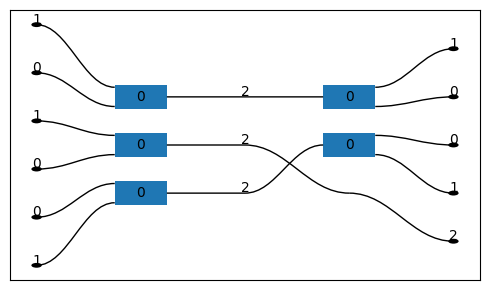

In [70]:
Hypergraph.from_yarrow(hypergraph.to_yarrow() @ (f >> g)).draw_matplotlib()

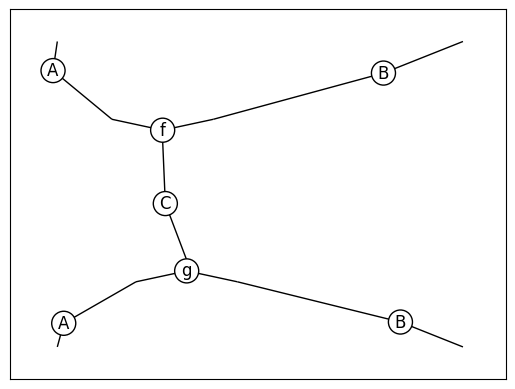

In [14]:
from discopy.frobenius import Box, Ty
from discopy.frobenius import Hypergraph as H

A, B, C = Ty('A'), Ty('B'), Ty('C')
f = Box('f', A @ B, C)
g = Box('g', C, A @ B)
dom = A @ B
cod = A @ B
h = H(
    dom, cod,
    (f, g),
    (0, 1, 0, 1, 2, 2, 3, 4, 3, 4)
)
h.draw()